Silhouette Scores:
Clusters=2, Silhouette Score=0.18579668722381615
Clusters=3, Silhouette Score=0.14901268740600798
Clusters=4, Silhouette Score=0.14055949421122468
Clusters=5, Silhouette Score=0.13113543247985504
Clusters=6, Silhouette Score=0.1344368355597464
Clusters=7, Silhouette Score=0.12971301717851091
Clusters=8, Silhouette Score=0.12322475980842035
Clusters=9, Silhouette Score=0.12146168655169844
Clusters=10, Silhouette Score=0.11859376007328085


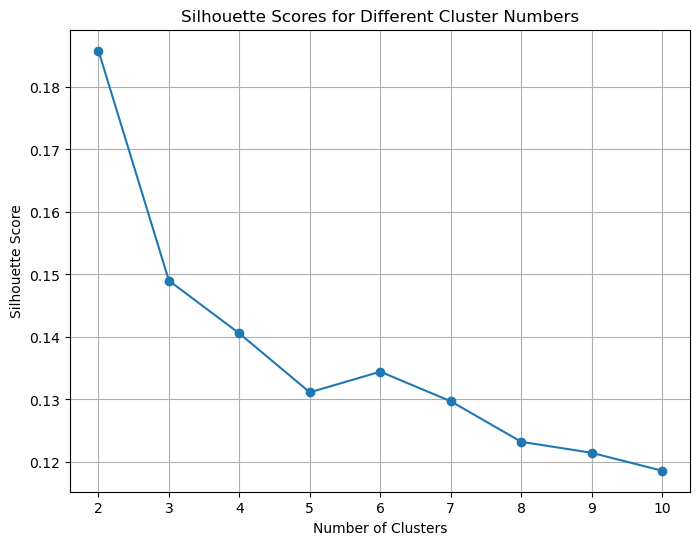

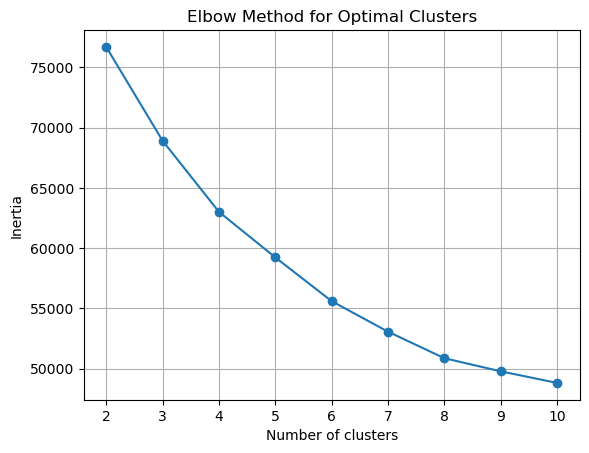

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Create a list to store the silhouette scores for different cluster numbers
silhouette_scores = []

# Determine the range of cluster numbers to try
cluster_range = range(2, 11)  # You can adjust this range as needed

for n_clusters in cluster_range:
    # Create and fit the KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    nursery_clusters_kmeans = kmeans.fit_predict(nursery_data_encoded)

    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(nursery_data_encoded, nursery_clusters_kmeans)
    silhouette_scores.append(silhouette_avg)

# Print the silhouette scores for different cluster numbers
print("Silhouette Scores:")
for i, score in enumerate(silhouette_scores):
    print(f"Clusters={i + 2}, Silhouette Score={score}")

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Numbers')
plt.grid()
plt.show()

# Perform the elbow method to find the optimal number of clusters
inertia = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(nursery_data_encoded)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure()
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid()
plt.show()


Silhouette Score for KMeans: 0.13113543247985504


C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\budal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

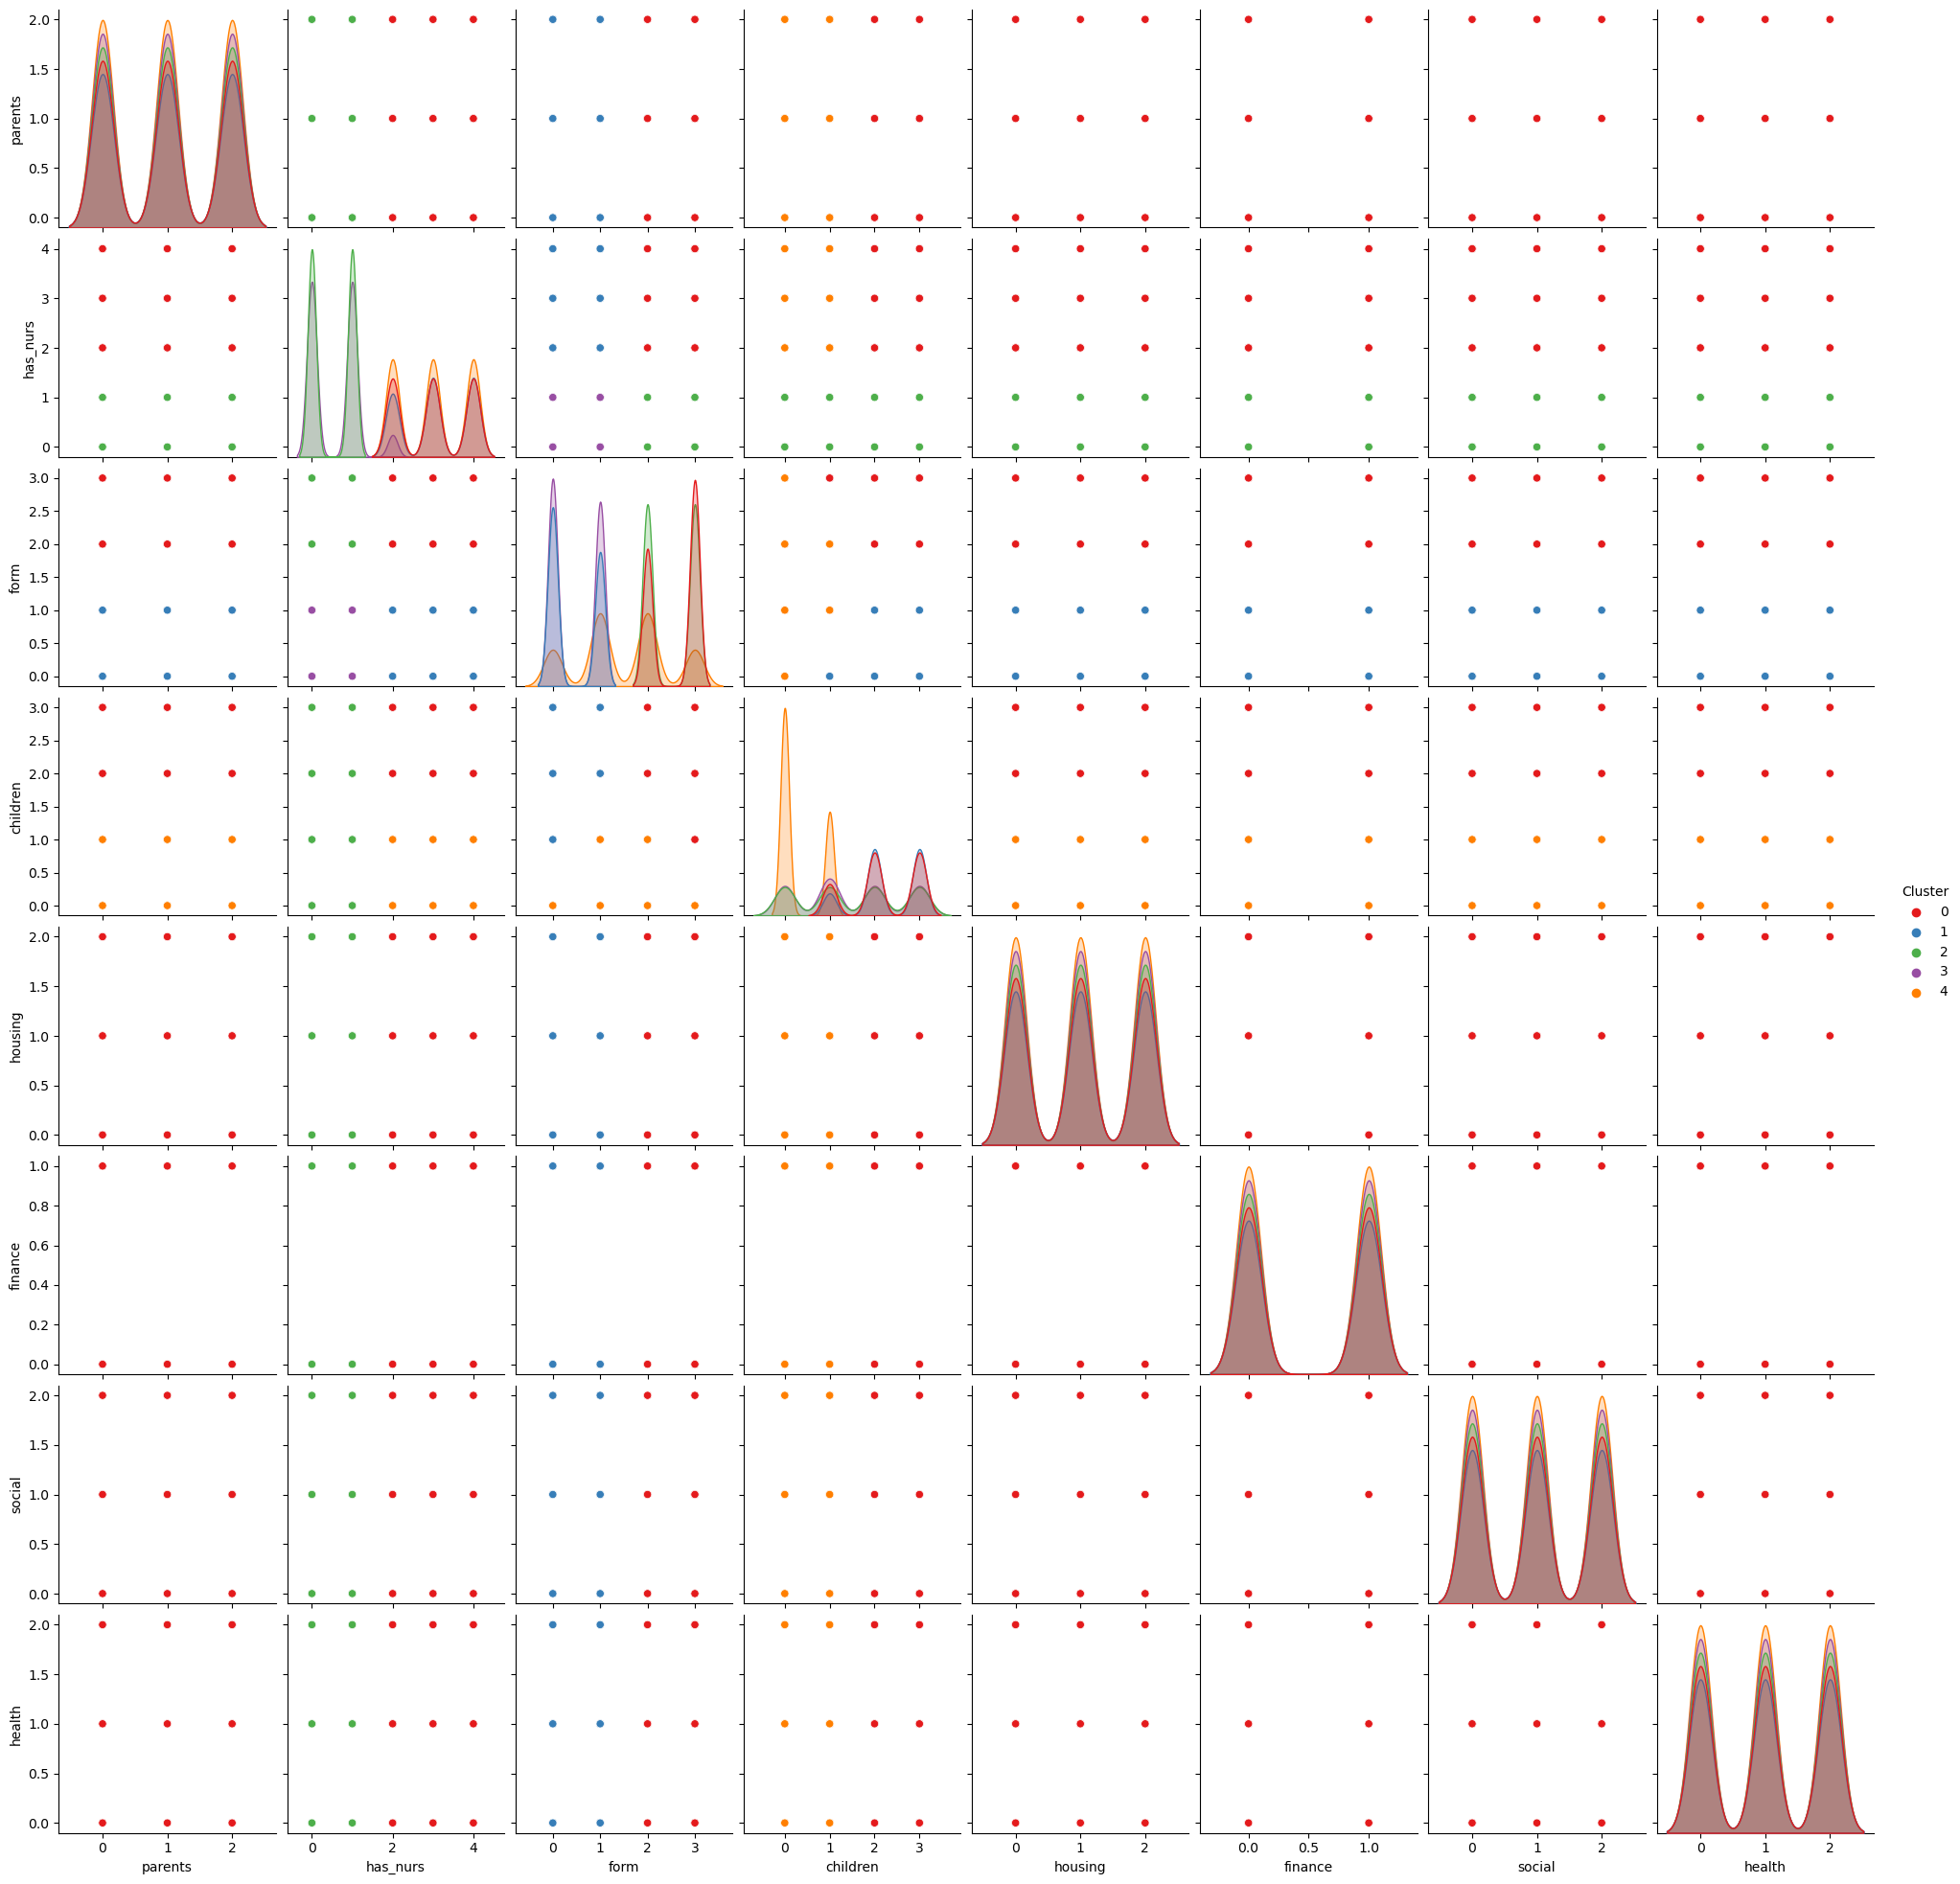

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Nursery Dataset
nursery_data = pd.read_csv("C:/Users/budal/Downloads/nursery/nursery.data", header=None)

# Define the column names
nursery_data.columns = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend'
]

# Encode categorical features
label_encoders = {}
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class_recommend']

for column in categorical_columns:
    le = LabelEncoder()
    nursery_data[column] = le.fit_transform(nursery_data[column])
    label_encoders[column] = le

# Drop the target column
nursery_data_encoded = nursery_data.drop(columns=['class_recommend'])

# Determine the optimal number of clusters
optimal_clusters = 5  # You can change this to your desired number of clusters

# Create and fit the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
nursery_clusters_kmeans = kmeans.fit_predict(nursery_data_encoded)

# Calculate silhouette score
silhouette_avg = silhouette_score(nursery_data_encoded, nursery_clusters_kmeans)
print(f"Silhouette Score for KMeans: {silhouette_avg}")

# Convert the cluster labels to a Pandas Series
cluster_series = pd.Series(nursery_clusters_kmeans, name="Cluster")

# Visualize KMeans clustering using a pair plot
nursery_data_plot = pd.concat([nursery_data_encoded, cluster_series], axis=1)
sns.pairplot(nursery_data_plot, hue="Cluster", palette="Set1")
plt.show()